#Dia 03 - Correlações, causalidade e relações entre genes.

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

urlDados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(urlDados, compression='zip')

#mudança do nome
mapa = {'droga':'composto'}
dados.rename(columns=mapa, inplace=True)

A função ```crosstab``` correlaciona colunas do dataframe de uma maneira simples e retorna uma matriz a partir da frequencia.



In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Vamos adicionar os dados de tratamento para distribuir junto pois é de suma importancia saber se o composto está ou não sendo analisado.

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Agora vamos explorar a proporção, usando o ```normalize``` que irá normalizar a tabela a partir do índice. Ele irá comparar as categorias, isso ajuda para verificarmos o balanceamento entre categorias e verificar proporcionalidade



In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Também é possivel agregar uma métrica ou função com uma coluna, primeiro vamos adicionar o ```values = dataframe['variavel']``` e o ```aggfunc``` que irá receber o parametro de alguma métrica, como a média.

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g-0'], aggfunc='mean')

Como temos muitas variaveis e elas são continuas a tabela não é uma saida muito viavel.

O ideal seria a construção de um gráfico. Primeiro vamos filtrar as colunas

In [ ]:
dados[['g-0', 'g-3']]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


A biblioteca Seaborn possui um gráfico chamado ```scatterplot```
também chamado de gráfico de dispersão.

Ele irá utilizar a variável de eixo x e y e o conjunto de dados que se chama dados mesmo.

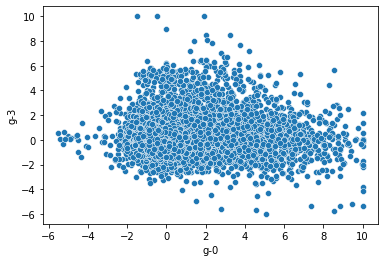

In [ ]:
sns.scatterplot(x='g-0', y='g-3', data=dados)

O gráfico acima não apresentou nenhum padrão definido. Vamos mudar a coluna para g-8 para testarmos

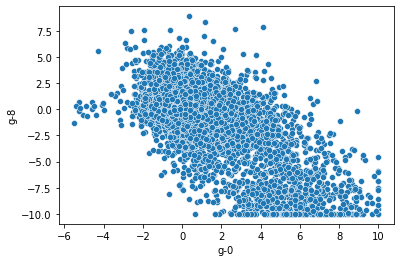

In [ ]:
sns.scatterplot(x='g-0', y='g-8', data=dados)

Foi identificado um padrão, conforme o g-0 aumenta o g-8 diminui. uma curva de inclinação negativa.

Vamos utilizar uma outra função do Seaborn, a ```lmplot``` Que irá desenhar no nosso gráfico essa suposta curva.

Os parametros são bem parecidos porém aqui é adicionado o ```line_kws = {'color': 'red'}``` que irá definir a cor da linha traçada.

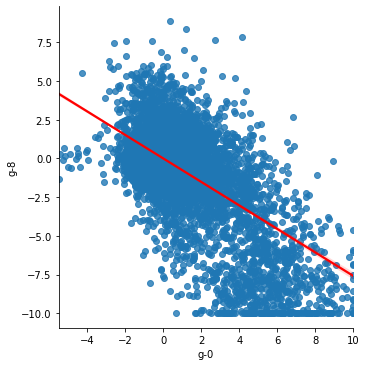

In [ ]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'})

Vamos separar mais o conjunto para filtrar a dosagem, tratamento e tempo.

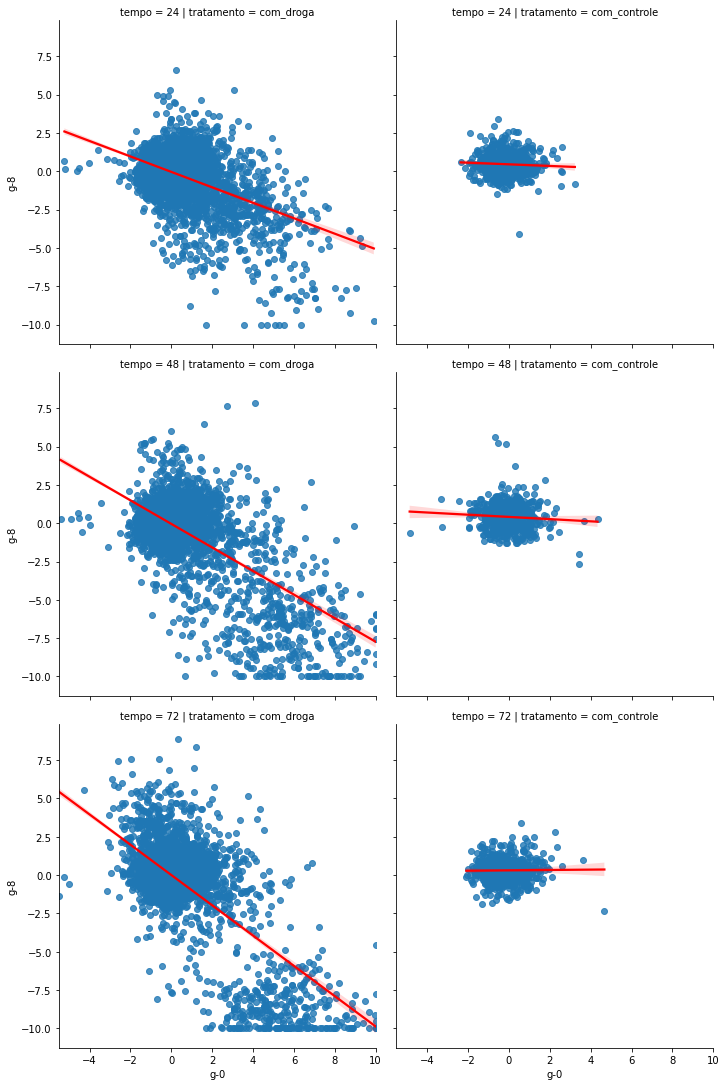

In [ ]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento', row='tempo')

O método de correlação também é usado para medir associação.

Vamos utilizar a função do pandas ```loc``` e o ```.corr``` que define o intervalo da correlação.

Para interpretar esse retorno vamos utilizar o seguinte:

- Valores muito próximos de 1 ou -1: variáveis altamente correlacionadas
- Valores muito próximos de 0: variáveis pouco ou não correlacionadas
---
- Valores muito próximos de 1: variáveis proporcionalmente correlacionadas
- Valores muito próximos de -1: variáveis correlacionadas inversamente proporcionais

E com isso é possivel analisar que no nosso gráfico de dispersão do g-0 e g-0 as variáveis estão correlacionadas e são inversamente proporcionais



In [ ]:
dados.loc[:,'g-0':'g-771'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

Como é dificil visualizar essa tabela com uma base grande geralmente é usado um mapa de calor para identificação.

O seaborn ja tem um código pronto onde só mudamos as variaveis.

Também foi importado o numpy para o mapa de calor.

In [ ]:
import numpy as np
corr = dados.loc[:,'g-0':'g-50'].corr()

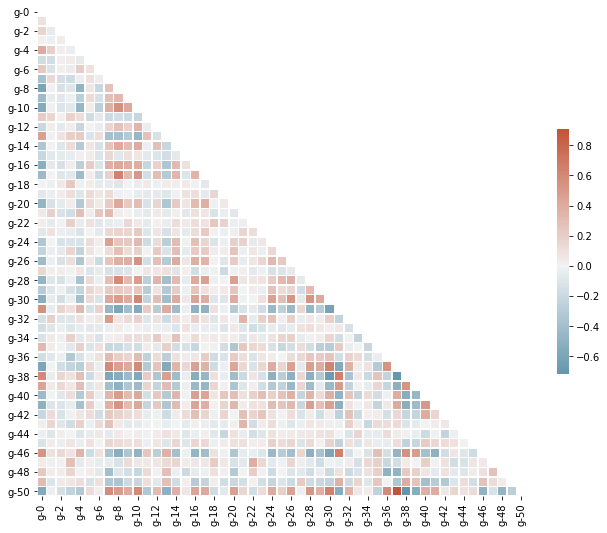

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Quando se vê uma correlação alta é interessante pesquisar e se aprofundar pois pode ser um caminho a se seguir.


In [ ]:
corrCelular = dados.loc[:,'c-0':'c-50'].corr()

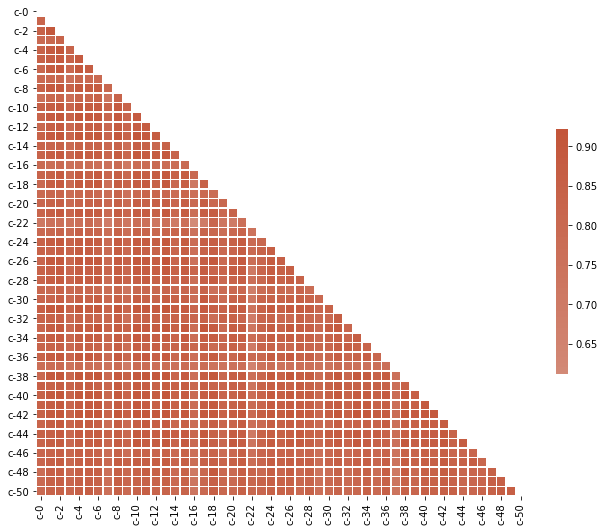

In [ ]:
mask = np.triu(np.ones_like(corrCelular, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corrCelular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Nesse gráfico podemos perceber uma correlação geral altamente proporcional.

**Dia 03 - Desafios**

1. Criar tabelas de frequência com pandas.groupby()

Resposta:

---

2. Normalizar o crosstab pela coluna.

Resposta:

---

3. Explorar outros agregadores.

Resposta:

---

4. Explorar o melt.

Resposta:

---

5. Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.  

Resposta:

---

6. Estudar o código que plota a matriz de correlação (heatmap)

Resposta:

---

7. Resumo do que você aprendeu com os dados

Resposta:  Hoje aprendi sobre mais métodos estatisticos e percebi o quanto preciso estudar mais estatistica e parte do pandas. Não consegui fazer os desafios no momento, em breve espero conseguir realizal-los.


